<center><h1>Song popularity prediction using Ensemble Modelling</h1></center>

### Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data loading and description](#section2)<br>
4. [Exploratory Data Analysis](#section3)<br>
5. [Modelling and Prediction](#section4)<br>
6. [Conclusion](#section5)

<a id="section1"></a><br>
### 1.Problem Statement<br>
Spotify for Developers offers a wide range of possibilities to utilize the extensive catalog of Spotify data. One of them are the audio features calculated for each song and made available via the official Spotify Web API.

The Dataset used in the project is the recent one (as in April 2019) contains more than 131k unique songs.
Each song (row) has values for artist name, track name, track id and the audio features itself.
Additionally, there is also a popularity feature included in this dataset. 

Our target is to predict the popularity of the song based on the audio features of the song.

<a id="section2"></a>
### 2.Data loading and description

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from mlxtend.classifier import EnsembleVoteClassifier
import warnings
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from mlens.ensemble import SuperLearner
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


warnings.filterwarnings('ignore')

seed = 1075
np.random.seed(seed)


[MLENS] backend: threading


In [33]:
dataFrame_complete=pd.read_csv('https://raw.githubusercontent.com/sangavivp/Machine-Learning-Projects/master/SpotifyPrediction_Ensemble/Data/SpotifyAudioFeaturesApril2019.csv')

In [3]:
dataFrame_complete.head(50)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912000,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878000,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
5,Curbo,26Y1lX7ZOpw9Ql3gGAlqLK,Debauchery - Original mix,0.001150,0.810,124016,0.417,0.919000,9,0.1060,-10.783,0,0.0793,120.025,4,0.8370,0
6,Bingo Play,5eIyK73BrxHLnly4F9PWqg,Grandma - Original mix,0.000539,0.819,132742,0.720,0.863000,4,0.0727,-8.895,0,0.1510,124.003,4,0.9340,0
7,G Herbo,13Mf2ZBpfNkgWJowvM5hXh,Bon appétit,0.115000,0.885,181838,0.348,0.000000,9,0.1070,-12.569,1,0.4510,142.111,4,0.1800,0
8,34 Feet,7BQaRTHk44DkMhIVNcXy2D,Among - Original mix,0.000058,0.740,124016,0.472,0.847000,8,0.0959,-9.008,1,0.0551,120.034,4,0.6220,0
9,Chris Cooq,049RxG2laEl9U1PGYeIqLV,Hazard - Original mix,0.000081,0.813,132742,0.731,0.910000,11,0.0727,-8.932,1,0.0697,124.031,4,0.9440,0


In [4]:
dataFrame_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 17 columns):
artist_name         130663 non-null object
track_id            130663 non-null object
track_name          130663 non-null object
acousticness        130663 non-null float64
danceability        130663 non-null float64
duration_ms         130663 non-null int64
energy              130663 non-null float64
instrumentalness    130663 non-null float64
key                 130663 non-null int64
liveness            130663 non-null float64
loudness            130663 non-null float64
mode                130663 non-null int64
speechiness         130663 non-null float64
tempo               130663 non-null float64
time_signature      130663 non-null int64
valence             130663 non-null float64
popularity          130663 non-null int64
dtypes: float64(9), int64(5), object(3)
memory usage: 16.9+ MB


In [5]:
dataFrame_complete['popularity'] = pd.qcut(dataFrame_complete['popularity'], 3, labels=['0', '1', '2']).cat.codes

In [6]:
train, test = train_test_split(dataFrame_complete, test_size=0.2, random_state=seed)

In [7]:
train.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,104530.000000,104530.000000,1.045300e+05,104530.000000,104530.000000,104530.000000,104530.000000,104530.000000,104530.000000,104530.000000,104530.000000,104530.000000,104530.000000,104530.000000
mean,0.342087,0.581505,2.127120e+05,0.569428,0.224892,5.231895,0.194839,-9.970807,0.608170,0.111896,119.492788,3.879126,0.439446,0.979814
std,0.345854,0.190090,1.244887e+05,0.260383,0.360804,3.608484,0.167760,6.537682,0.488161,0.124048,30.142705,0.513419,0.258869,0.811805
min,0.000000,0.000000,4.556000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031000,0.459000,1.638628e+05,0.396000,0.000000,2.000000,0.097600,-11.898000,0.000000,0.038900,96.011000,4.000000,0.224000,0.000000
50%,0.202000,0.605000,2.018450e+05,0.604000,0.000152,5.000000,0.124000,-7.977000,1.000000,0.055900,120.028500,4.000000,0.420000,1.000000
75%,0.637000,0.727000,2.411842e+05,0.776000,0.450750,8.000000,0.236000,-5.681000,1.000000,0.129000,139.634250,4.000000,0.638000,2.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,2.000000


<a id="section3"></a>
### 3. EDA

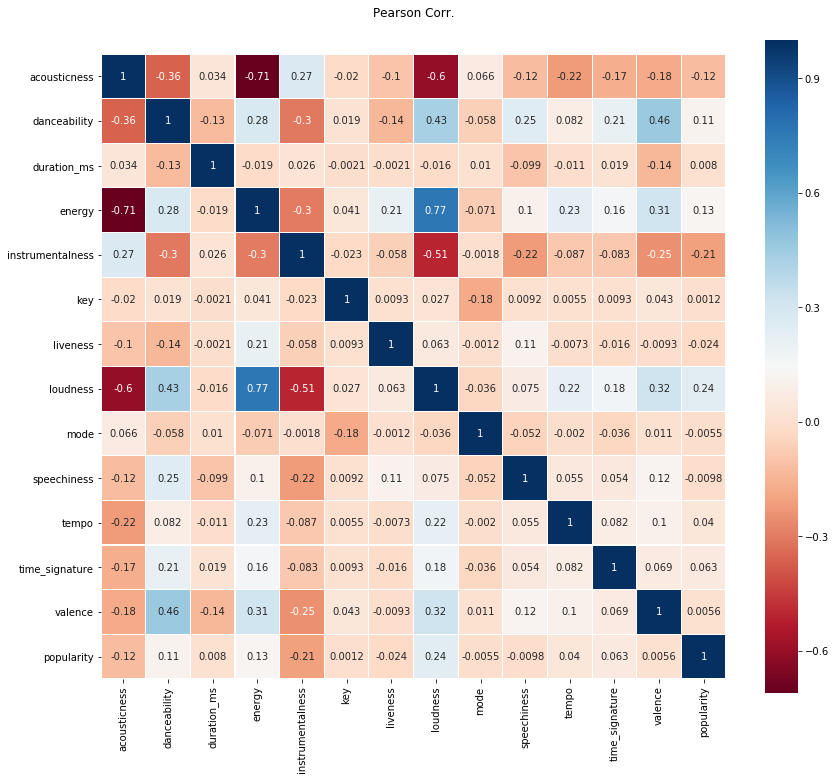

In [8]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Corr.', y=1.05, size=12)
sns.heatmap(train.corr(),linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

#### From the Correlation plot it can be derived that we can drop 

* duration_ms
* mode
* key

#### As these features are not having any significant correlation with the target feature(Popularity)

In [9]:
train.drop(['duration_ms','mode','key'],axis=1,inplace=True)
test.drop(['duration_ms','mode','key'],axis=1,inplace=True)

C:\Users\sanga\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [10]:
train

,artist_name,track_id,track_name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,popularity
84722,Luciano,6UElILjrnJ0CsbGNpGHSXe,Haul and Pull Up,0.156000,0.7980,0.5340,0.000000,0.0544,-9.438,0.1840,79.488,4,0.7440,1
56840,Nathan Menard,4JPPALmbSSj8LlLpceAmXG,Claim It,0.288000,0.7660,0.5290,0.000000,0.1790,-6.625,0.0584,139.938,4,0.3930,0
9043,N.O.R.E.,6HxcyWOKzcZtazjQ1GtwPn,God,0.020200,0.5260,0.4600,0.000001,0.1040,-8.834,0.1350,105.664,4,0.2360,0
52427,William Bolton,614sEj7ST8cyIXC0yMnZpL,Honest,0.182000,0.6500,0.5540,0.000005,0.2560,-7.914,0.2340,157.896,4,0.4490,1
41767,Spuds,0VBHqRWs4pLXpzUw5uqntq,Get Higher,0.172000,0.6340,0.8610,0.000000,0.4460,-8.813,0.2440,146.954,4,0.6620,1
104389,Bright Righteous,6zmCXOCgjp4KV2y0QC97W6,Satellites,0.000106,0.2960,0.5780,0.340000,0.1160,-7.763,0.0297,120.058,4,0.1790,1
33739,DJ Straight G,1j2yLgRFWjge6CvoqhWfQ9,Step Back Chump,0.001240,0.8210,0.6780,0.143000,0.2190,-8.741,0.5510,100.146,4,0.6840,0
32791,Henry Purcell,25y7P0QVln0yR0sC6h0vZj,"A Choice Collection of Lessons, Suite No. 3 in...",0.919000,0.3210,0.4490,0.940000,0.0731,-12.363,0.0317,143.240,3,0.9270,0
4810,Nick Dorian,0x9bNbN63u3kEGgq9sJKeV,Yawn,0.815000,0.6580,0.7320,0.026800,0.1130,-5.993,0.0413,90.062,4,0.6230,1
116980,Ellie Goulding,0Cy7wt6IlRfBPHXXjmZbcP,Love Me Like You Do,0.270000,0.4890,0.5970,0.000000,0.1050,-6.633,0.0292,95.012,4,0.3240,2


#### As songID is enough to identify the song we can drop popularity,artist_name,track_id for now

In [11]:
y=train['popularity']
X=train.drop(['popularity','artist_name','track_id','track_name'],1)

In [12]:
y_test=test['popularity']
X_test=test.drop(['popularity','artist_name','track_id','track_name'],1)

In [16]:
X.shape


(104530, 10)

<a id="section5"></a>
#### 4. Modelling and Prediction

In [18]:
rf = RandomForestClassifier(n_estimators=20,min_samples_split=50,random_state=seed)
knn = KNeighborsClassifier(n_neighbors=50)


classifiers = [rf,knn]

for clf in classifiers:
    vanilla_scores = cross_val_score(clf, X, y, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, 
       max_samples=0.4, max_features=10, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=10, 
       n_jobs=-1)
    
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__, 
                                                              vanilla_scores.mean(), vanilla_scores.std()))
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__, 
                                                                        bagging_scores.mean(), bagging_scores.std()))
    

Mean of: 0.471, std: (+/-) 0.005 [RandomForestClassifier]
Mean of: 0.477, std: (+/-) 0.005 [Bagging RandomForestClassifier]

Mean of: 0.428, std: (+/-) 0.004 [KNeighborsClassifier]
Mean of: 0.430, std: (+/-) 0.005 [Bagging KNeighborsClassifier]



In [15]:
rf2 = RandomForestClassifier(n_estimators=100,min_samples_split=50,random_state=seed)
knn2 = KNeighborsClassifier(n_neighbors=30)


classifiers2 = [rf2,knn2]

for clf in classifiers2:
    vanilla_scores = cross_val_score(clf, X, y, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, 
       max_samples=0.4, max_features=10, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=10, 
       n_jobs=-1)
    
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__, 
                                                              vanilla_scores.mean(), vanilla_scores.std()))
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__, 
                                                                        bagging_scores.mean(), bagging_scores.std()))
    

Mean of: 0.480, std: (+/-) 0.004 [RandomForestClassifier]
Mean of: 0.479, std: (+/-) 0.004 [Bagging RandomForestClassifier]

Mean of: 0.424, std: (+/-) 0.005 [KNeighborsClassifier]
Mean of: 0.429, std: (+/-) 0.005 [Bagging KNeighborsClassifier]



In [17]:
rf3 = RandomForestClassifier(n_estimators=500,min_samples_split=100,random_state=seed)
knn3 = KNeighborsClassifier(n_neighbors=100)


classifiers3 = [rf3,knn3]

for clf in classifiers3:
    vanilla_scores = cross_val_score(clf, X, y, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, 
       max_samples=0.4, max_features=10, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=10, 
       n_jobs=-1)
    
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__, 
                                                              vanilla_scores.mean(), vanilla_scores.std()))
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__, 
                                                                        bagging_scores.mean(), bagging_scores.std()))
    

C:\Users\sanga\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Mean of: 0.481, std: (+/-) 0.004 [RandomForestClassifier]
Mean of: 0.475, std: (+/-) 0.005 [Bagging RandomForestClassifier]

Mean of: 0.430, std: (+/-) 0.004 [KNeighborsClassifier]
Mean of: 0.430, std: (+/-) 0.005 [Bagging KNeighborsClassifier]



In [19]:
eclf = VotingClassifier(estimators=[('Random Forests', rf), 
                                    ('KNeighbors', knn)], voting='hard')

for clf, label in zip([rf, knn, eclf], ['Random Forest', 
                                                     'KNeighbors', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Mean: 0.471, std: (+/-) 0.005 [Random Forest]
Mean: 0.428, std: (+/-) 0.004 [KNeighbors]
Mean: 0.449, std: (+/-) 0.004 [Ensemble]


In [22]:
ebclf_array = []

for clf in classifiers:
    ebclf_array.append(BaggingClassifier(clf, max_samples=0.25, 
                                   max_features=10, random_state=seed))

v_eclf = VotingClassifier(estimators=zip(['Bagging Random Forest', 'Bagging Ensemble'],
                                         ebclf_array), 
                          voting='hard')

#ebclf_array.append(v_eclf)

for clf, label in zip(ebclf_array, ['Bagging Random Forest', 'Bagging KNeighbors',
                               'Bagging Ensemble']):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Mean: 0.475, std: (+/-) 0.006 [Bagging Random Forest]
Mean: 0.430, std: (+/-) 0.005 [Bagging KNeighbors]


In [26]:
ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = XGBClassifier()

boost_array = [ada_boost, grad_boost, xgb_boost]

eclf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')

labels = ['Ada Boost', 'Grad Boost', 'XG Boost', 'Ensemble']

for clf, label in zip([ada_boost, grad_boost, xgb_boost, eclf], labels):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Mean: 0.448, std: (+/-) 0.005 [Ada Boost]
Mean: 0.469, std: (+/-) 0.005 [Grad Boost]
Mean: 0.466, std: (+/-) 0.005 [XG Boost]
Mean: 0.466, std: (+/-) 0.005 [Ensemble]


In [31]:


logreg = LogisticRegression()

seed = 1075

ensemble = SuperLearner(scorer = accuracy_score, 
                        random_state=seed, 
                        folds=10,
                        verbose = 2)
X_train=X
y_train=y

# Build the first layer
ensemble.add([rf, knn])
# Attach the final meta estimator
ensemble.add_meta(logreg)

ensemble.fit(X_train, y_train)
preds = ensemble.predict(X_test)
print("Fit data:\n%r" % ensemble.data)
a = "{:.3f}".format(accuracy_score(preds,y_test))
print("Accuracy score: ", a)


Fitting 2 layers
Processing layer-1             done | 00:00:35
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:36

Predicting 2 layers
Processing layer-1             done | 00:00:02
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:02
Fit data:
                                   score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  kneighborsclassifier         0.43     0.00  0.40  0.18  3.33  0.98
layer-1  randomforestclassifier       0.47     0.01  8.33  0.71  0.08  0.02

Accuracy score:  0.443


<a id="section5"></a>
#### 5. Conclusion

* Random Forest classifier is giving slightly better accuracy on predicting the accuracy than K nearest neighbours
* Overall prediction accuracy is 44%, which could be improved with different classifiers and parameter tuning.